## Code and Output

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import load_boston

In [2]:
#loading the data
dataset = load_boston()

In [3]:
print(type(dataset))
dataset.keys()

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
X = pd.DataFrame(dataset['data'])
y = pd.DataFrame(dataset['target'])

In [5]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
X.columns

RangeIndex(start=0, stop=13, step=1)

In [7]:
#renaming columns from integer values to descriptive feature names
X = X.rename(columns = { 0: 'CRIM', 1 : 'ZN', 2 : 'INDUS', 3 : 'CHAS', 4 : 'NOX',
                        5 : 'RM' , 6 : 'AGE', 7 : 'DIS', 8 : 'RAD', 9 : 'TAX', 
                        10 : 'PTRATIO' , 11 : 'B', 12 : 'LSTAT'})
y = y.rename(columns = {0 : 'Median Value in $1000'})

In [8]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [9]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
X.shape

(506, 13)

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
# partitiong the data in training and test datasets
X_train = X[0 : 400]
y_train = y[0 : 400]
X_test = X[400 :]
y_test = y[400 :]

In [13]:
X_train.shape

(400, 13)

In [14]:
def data_normalise (x):
    X = np.array(x)
    Mean, Std = np.mean(X, axis = 0).T, np.std(X, axis = 0).T
    for col in range(X.shape[1]):
        mean, std = Mean[col], Std[col]
        X[:, col] = (X[:, col] - mean) / std
    return (X, Mean, Std)

In [15]:
# normalising the dataset to have a mean of 0 and standard deviation of 1
normalised = data_normalise(X_train)
normalised_X_train = normalised[0]
training_mean = normalised[1]
training_std = normalised[2]
print('Standard Deviation of features of training data after normalisation:')
np.std(normalised_X_train, axis = 0)

Standard Deviation of features of training data after normalisation:


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
class LinearRegression:
    def __init__(self):
        pass
    
    def predict(self, x, theta, mean, std):
        X = np.array(x)
        for col in range(X.shape[1]):
            X[:, col] = (X[:, col] - mean[col]) / std[col]
        m = X.shape[0]
        X_new = np.c_[np.ones((m, 1)), X]
        y_pred = X_new.dot(theta)        
        return y_pred
    
    def calculate_error(self, X, y, y_pred, theta):
        m = X.shape[0]
        diff = (y_pred - y)
        error = math.sqrt((1 / m) * (np.sum((diff * diff), axis = 0)))
        return error
    
    def fit(self, X, y, eta = 0.01, max_iter = 400):
        m = X.shape[0]
        
        #inserting a column of all ones for bias
        X_new = np.c_[np.ones((m, 1)), X]
        
        error = np.zeros((max_iter, 1))
        theta = np.random.rand(X_new.shape[1], 1)
        for iteration in range (max_iter):
            y_pred = X_new.dot(theta)
            gradient = (2 / m) * (X_new.T).dot(y_pred - y)
            theta = theta - (eta * gradient)
            error[iteration] = self.calculate_error(X, y, y_pred, theta)
        plt.plot(range(1, max_iter + 1), error)
        plt.title('Value of Cost function for successive iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Value of Cost Function')
        plt.show()
        return theta            

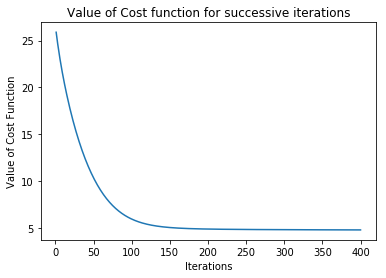

In [17]:
lin_reg = LinearRegression()
theta = lin_reg.fit(normalised_X_train, y_train)

In [18]:
y_test_pred = lin_reg.predict(X_test, theta, training_mean, training_std)
test_error = lin_reg.calculate_error(X_test, y_test , y_test_pred, theta)
print('The RMSE error is %f' %test_error)

The RMSE error is 5.700427
